# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-47, 48, 49 (Stand: April 2024)

[Raum F1-08](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Ideales und reales Gas

Tin Vrkic E-Mail: uyvpq@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Mika Nock E-Mail: uttzi@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Joshua Turnwald

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 03.06.24

---

**Beanstandungen zu Protokoll Version _____:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Ideales_und_reales_Gas/README.md).**

In [2]:
# importieren der nötigen Module
import kafe2
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties import unumpy as unp

# definition der Umrechnung von mmHg zu mbar
lam = 1.33322

# erstellen einer Funktion für kafe2 Fits
def fit_funktion(xy_data, model_function, xy_error, xy_label, title, constraint=[]):
    xy_data = kafe2.XYContainer(xy_data[0], xy_data[1])
    xy_data.label = title
    fit = kafe2.XYFit(xy_data = xy_data, model_function = model_function)
    fit.add_error(axis = 'x', err_val = xy_error[0])
    fit.add_error(axis = 'y', err_val = xy_error[1])
    for i in range(len(constraint)):
        fit.add_parameter_constraint(name = constraint[i][0], value = constraint[i][1], uncertainty = constraint[i][2])
    fit.do_fit()
    plot = kafe2.Plot(fit)
    plot.x_label, plot.y_label = xy_label[0], xy_label[1]
    
    return fit.parameter_values, fit.parameter_errors, plot

## Aufgabe 1: Messung des absoluten Nullpunkts mit Hilfe eines Gasthermometers

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Ideales_und_reales_Gas/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie den [Volumenausdehnungskoeffizienten](https://de.wikipedia.org/wiki/Ausdehnungskoeffizient) $\gamma$ von Luft und berechnen Sie daraus die Temperatur des absoluten Nullpunkts $\vartheta_{0}$ in $^{\circ}\mathrm{C}$.
 * Überprüfen Sie den Effekt, den die Ausdehnung des Glaskolbens K als Funktion von $\vartheta$ hat und korrigieren Sie Ihre Messung entsprechend. 
 
---

In [3]:
# aufnehmen der Messwerte
h_0_kalt = np.array([18.93,18.89,18.92,18.91]) * 10
delta_h_kalt = np.array([15.06,15.03,15.06,15.09]) * 10 - h_0_kalt

h_0_warm = np.array([18.91,18.91,18.90,18.91])*10
delta_h_warm = np.array([41.25, 41.97, 41.34, 42.0])*10 - h_0_warm

# Bestimmung des Mittelwertes und der Standartabweichung
error_h = 0.2
error_h_kalt = np.sqrt(0.2**2 + np.std(delta_h_kalt)**2)
error_h_warm = np.sqrt(0.2**2 + np.std(delta_h_warm)**2)

h_kalt = ufloat(np.mean(delta_h_kalt),error_h_kalt)
h_warm= ufloat(np.mean(delta_h_warm),error_h_warm)

p_kalt = lam*h_kalt + 1000
p_warm = lam*h_warm + 1000

In [4]:
# Berechnung von gamma
theta_0 = - (p_kalt*100) / (p_kalt-p_warm)

print(f'Die Mittelwerte der berechneten Höhen betragen {h_kalt,h_warm}mm')
print(f'Der Absolute Nullpunkt beträgt {theta_0}°C')

Die Mittelwerte der berechneten Höhen betragen (-38.52500000000001+/-0.2772634126602445, 227.32500000000002+/-3.4506339997165654)mm
Der Absolute Nullpunkt beträgt 267.6+/-3.5°C


In diesem Versuch wird mithilfe der Ausdehnung eines Gases der absolute Nullpunkt der Temperaturskala bestimmt. Hierbei wird mithilfe eines Quecksilbermanometers der Druck in einem festen Volumen bei verschiedenen Temperaturen gemessen und so der Ausdehnungskoeffizient des Gases und hierüber der Nullpunkt errechnet. 

Gestartet wird mit einem Wasserbad bei $0°C$, in das das Gefäß mit Luft getaucht wird. Nach $15min.$ wird nun die Höhendifferenz der Quecksilbersäulen im Manometer mithilfe eines Kathetometers jeweils vier Mal abgelesen. Danach wird das Wasserbad zum Kochen gebracht und die selbe Messung wiederholt. Die Säule im linken Schenkel kann hierbei an einen Glasdorn gebracht werden, damit das Volumen im Glasgefäß konstant gehalten wird. 

Für die Höhendifferenzen ergeben sich im Mittel über vier Messungen einmal $-38.53 \pm 0.28 mm$ für $0°C$ und $227.33 \pm 3.45 mm$, mit einer Ableseunsicherheit von $0.2mm$. Hierbei kann die Höhendifferenz des Quecksilbers umgerechnet werden in den Druck im Glasgefäß mithilfe der Formel $$p = p_0 + \rho_{Hg}g \cdot \Delta h \approx 1.33322 \cdot \Delta h$$
Mihilfe der folgenden Umrechnung ergibt sich aus dem Druck in Abhängigkeit von der Temperatur der absolute Nullpunkt $\vartheta_0$. $$p(T) = p_0(1+\gamma \vartheta_0) = 0$$ $$\vartheta_0 = - \frac{1}{\gamma} = -\frac{p_0 \cdot 100}{p_0 - p( \vartheta_s )}$$

Insgesamt erhalten wir also für den absoluten Nullpunkt $267.6 \pm 3.5 °C$. Auf diesem Ergebnis liegen jedoch noch mehrere Fehler, die verschieden starke Auswirkungen auf das Ergebnis haben. Die Auswirkung dieser Fehler auf $\gamma$ wird in der folgenden Tabelle dargestellt:


| Fehler | Auswirkung |
| --- | --- |
| thermische Ausdehnung K | $\gamma$ wird als zu klein ermittelt, da der Druck im Gefäß weniger steigt als er eigentlich sollte. Das liegt daran, dass sich das Volumen in dem sich das Gas befindet mit steigender Temperatur größer wird. |
| Verformung von K unter Druck | Hier gilt die selbe Argumentation wie beim Fehler zuvor, jedoch wird das Volumen aufgrund des inneren Druckes größer und nicht aufgrund der steigenden Temperatur. |
| Luft als reales Gas | Hier wird $\gamma$ als zu groß ermittelt. Das liegt daran, dass im relaen Gas ein zusätzlicher Binnendruck existiert, der die Messung nach oben verfälscht. |
| Ein Teil des Gases in RZ | $\gamma$ wird wieder als zu klein ermittelt, da sich das Gas in RZ nicht gemeinsam mit dem in K erwärmt. Das führt zu einem Geringeren Druck. |

In [5]:
T_s = 100 - theta_0
gam_k = ufloat(0.9,0.1) * 10**-5

gam_korr = ((1+T_s*gam_k) *p_warm -p_kalt) / (p_kalt*100)
theta_0_korr = -1/gam_korr
print(f'Der korrigierte Wert für Gamma beträgt {gam_korr}')
print(f'Der korrigierte Wert für den Absoluten Nullpunkt beträgt {theta_0_korr}°C')

Der korrigierte Wert für Gamma beträgt 0.00372+/-0.00005
Der korrigierte Wert für den Absoluten Nullpunkt beträgt -269+/-4°C


Da nur die thermische Ausdehnung von K einen nennenswerten Einfluss hat wird nur für diese eine Korrekturrechnung durchgeführt. Die hierfür verwendete Gleichung ist 
$$\gamma^{(1)} = \frac{(1+T_s\gamma_k)p(\vartheta_s) - p_0}{p_0\vartheta_s}$$ 
$$T_s = \vartheta_s + \frac{1}{\gamma}=\vartheta_s- \vartheta_0$$ 

$\gamma_k$ meint hierbei den kubischen Asudehnungskoeffizienten von Glas und beläuft sich auf $(0.9 \pm 0.1) \cdot 10^{-5}K^{-1}$.

Es ergibt sich somit ein korrigierter Wert $\gamma = 0.00372 \pm 0.00005 K^{-1}$ woraus sich für den absoluten Nullpunkt ein korrigierter Wert von $\vartheta_0 = -269 \pm 4 °C$ 

## Aufgabe 2: Messung des Adiabatenexponenten $\kappa$

**Hinweise zu Aufgabe 2 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Ideales_und_reales_Gas/doc/Hinweise-Versuchsdurchfuehrung-a.md).**

 * Bestimmen Sie den Adiabatenkoeffizienten $\kappa$ von Luft (und ggf. Argon) mit Hilfe von zwei verschiedenen Methoden. 
 * Vergleichen Sie die Werte für $\kappa$ von Luft, die Sie mit Hilfe beider Methoden bestimmt haben.  
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

---

### Aufgabe 2.1: Messung nach der Methode von [Clément-Desormes](https://de.wikipedia.org/wiki/Experiment_von_Cl%C3%A9ment-Desormes) 

 * Beschreiben Sie den Prozess zur Bestimmung von $\kappa$ in eigenen Worten. 
 * Führen Sie eine hinreichend lange Messreihe durch, um ein Maß für die Streuung aufgrund statistischer Fluktuationen zu erhalten.
 * Bestimmen Sie aus Ihrer Messreihe $\kappa$ mit entsprechender Unsicherheit $\Delta\kappa$.

---

Zunächst befindet sich in der Glasflasche derselbe Druck wie außen, demnach sind die Säulen des Manometers gleich hoch. Wird nun mit dem Handblasebalg zuerst ein Überdruck in der Glasflasche erzeugt und dann das Ventil so eingestellt, dass Manometer und Glasflasche verbunden werden und das Manometer den Druck in der Glasflasche misst, so wirkt auf die Flüssigkeitssäule im Manometer, die direkt mit der Glasflasche verbunden ist, ein stärkerer Druck als zuvor, sie sinkt also und drück entsprechend die andere Säule des U-Rohrs nach oben. Diese Höhendifferenz $\Delta h_1$ kann man messen und als erste von zweien für die Berechnung von $\kappa$ nutzen. Dann öffnet man das Ventil oben an der Glasflasche für wenige Sekunden, um einen Druckausgleich herzustellen, wobei aber keine Wärme ausgetauscht werden soll (adiabatische Expansion). Der Druck in der Glasflasche ist jetzt wieder gesunken, die Höhendifferenz der Flüssigkeitssäulen im Manometer entsprechend auch. Diese neue Höhendifferenz $\Delta h_2$ kann man ebenfalls wieder messen und als zweite von zweien für die Berechnung von $\kappa$ nutzen. Schließlich wird ein vollständiger Druckausgleich vorgenommen und die Messung kann von neuem beginnen. Wir haben die Messung drei mal durchgeführt. Zusätzlich kann man die Messreihe noch zwei weitere Male durchführen, wobei man das Ventil jeweils kürzer und länger offenlässt, als man es sonst hätte, um ein Gefühl dafür zu bekommen, ob die Öffnungsdauer bei der normalen Messreihe angemessen war.  
Kurz noch einmal die Schritte zusammengefasst und was genau dabei im P-V-Diagramm passiert, welches unten dargestellt ist:  
1. Überdruck in der Glasflasche erzeugen (Schritt $(3)$ nach $(1)$ im Diagramm) und den isochoren Temperaturausgleich abwarten: Zustand $(p_0+\Delta p_1$, $V_0$, $T_0)=(p_1$, $V_0$, $T_0)$  
2. Höhendifferenz $\Delta h_1$ der Flüssigkeitssäulen ablesen  
3. Wenige Sekunden lang das Ventil öffnen damit es zu einen Druckausgleich mit der Umgebung durch adiabatische Expansion kommen kann (Schritt $(1)$ nach $(2)$ im Diagramm): $(p_0$, $V_0+\Delta V$, $T_0-\Delta T)$  
4. Das Ventil wieder schließen (Schritt $(2)$ nach $(3)$ im Diagramm): Zustand $(p_0$, $V_0$, $T_1)$  
5. Aufgrund isochorer Erwärmung stellt sich erneut ein Überdruck ein (Schritt $(3)$ nach $(4)$ im Diagramm): Zustand $(p_0+\Delta p_2$, $V_0$, $T_0)=(p_2$, $V_0$, $T_0)$   
6. Höhendifferenz $\Delta h_2$ der Flüssigkeitssäule ablesen  
7. Vollständigen Druckausgleich vornehmen, indem das Ventil ganz geöffnet wird  
8. Starte wieder bei Punkt 1  

![p-v-diagramm](figures/Clement-Desormes.png)


In [6]:
h_01_normal = np.array([24.4, 25.2, 24.3])
delta_h1_normal = np.array([7.9, 7.1, 8.1]) - h_01_normal

h_02_normal = np.array([20.1, 20.7, 20.3])
delta_h2_normal = np.array([12.3, 11.7, 11.6]) - h_02_normal

h_01_short = np.array([25.8, 23.9, 25.5])
delta_h1_short = np.array([6.6, 8.2, 6.7]) - h_01_short

h_02_short = np.array([24.7, 23.0, 24.4])
delta_h2_short = np.array([7.6, 9.3, 7.9]) - h_02_short

h_01_long = np.array([25.9, 23.4, 24.2])
delta_h1_long = np.array([6.3, 8.8, 8.0]) - h_01_long

h_02_long = np.array([18.3, 17.9, 18.6])
delta_h2_long = np.array([14.0, 14.4, 13.8]) - h_02_long

h_21_std = .1
# Gaußsche Fehlerfortpflanzung, da die Höhenunterschiede berechnet werden aus der Differenz der 
# tatsächlichen Höhen, deren Unsicherheit bestimmt wurde:
delta_h21_std = h_21_std * np.sqrt(2)

Um den Adiabatenexponenten $\kappa$ zu bestimmen, nutzen wir die normale Messreihe und folgende Formel:
$$\kappa=\frac{\Delta h_1}{\Delta h_1-\Delta h_2}$$  

Zunächst berechnen wir den gewichteten Mittelwert aus der normalen Messreihe, d.h. aus der Messreihe, bei dem das Ventil nach Gefühl angemessen lang offen gehalten wurde. Da aber die Unsicherheit auf jeden Messwert die selbe ist, ist es einfach nur der Mittelwert.

In [7]:
kappa1_i = delta_h1_normal / (delta_h1_normal - delta_h2_normal)

# gewichteter Mittelwert aus der normalen Messreihe
kappa1_bar = np.sum(kappa1_i)/3
# Unsicherheit auf den gewichteten Mittelwert
kappa1_std = np.sqrt( (kappa1_i.size/(kappa1_i.size-1)) * np.sum( (kappa1_i-kappa1_bar)**2 ) / kappa1_i.size)

print(f"Adiabatenkoeffizient kappa aus der normalen Messreihe: {kappa1_bar:.2f} +/- {kappa1_std:.2f}")

Adiabatenkoeffizient kappa aus der normalen Messreihe: 2.02 +/- 0.13


Wir haben ganz offensichtlich leider zu wenige Messwerte genommen, drei reichen natürlich nicht aus um gute statistische Aussagen treffen zu können, deshalb erhalten wir auch einen Wert, der zu hoch ist: $\kappa=(2.02\pm0.13)$.  
Dann haben wir noch 2 weitere Messreihen gemacht, wobei wir die Öffnungsdauer variiert haben, um ein Gefühl dafür zu bekommen, ob die Öffnungsdauer bei der normalen Messreihe angemessen war oder zu kurz / lang.

In [8]:
kappa2_i = delta_h1_short / (delta_h1_short - delta_h2_short)
kappa3_i = delta_h1_long / (delta_h1_long - delta_h2_long)

# gewichteter Mittelwert aus der kurzen bzw. langen Messreihe
kappa2_bar = np.sum(kappa2_i)/3
kappa3_bar = np.sum(kappa3_i)/3
# Unsicherheit auf die gewichteten Mittelwerte
kappa2_std = np.sqrt( (kappa2_i.size/(kappa2_i.size-1)) * np.sum( (kappa2_i-kappa2_bar)**2 ) / kappa2_i.size)
kappa3_std = np.sqrt( (kappa3_i.size/(kappa3_i.size-1)) * np.sum( (kappa3_i-kappa3_bar)**2 ) / kappa3_i.size)

print(f"Adiabatenkoeffizient kappa aus der kurzen Messreihe: {kappa2_bar:.2f} +/- {kappa2_std:.2f}")
print(f"Adiabatenkoeffizient kappa aus der langen Messreihe: {kappa3_bar:.2f} +/- {kappa3_std:.2f}")

Adiabatenkoeffizient kappa aus der kurzen Messreihe: 8.39 +/- 0.67
Adiabatenkoeffizient kappa aus der langen Messreihe: 1.34 +/- 0.07


- kurze Messreihe: $\kappa=(8.39\pm0.67)$  
- lange Messreihe: $\kappa=(1.34\pm0.07)$  

Man sieht, dass die kurze Messreihe einen Wert liefert, der viel zu hoch ist, unsere normale Öffnungsdauer war also zumindest nicht zu kurz. Die lange Messreihe liefert aber einen viel besseren Wert als unser normales $\kappa$, wobei der Literaturwert sogar im Unsicherheitsbereich liegt. Das heißt also, dass wir das Ventil ruhig hätten noch etwas länger aufhalten können.  

Die Fits aus der v2 sind also überflüssig, unser Ergebnis für den Adiabatenkoeffizienten ist also $\kappa=(2.02\pm0.13)$, wobei, wie gesagt, zu wenig Messwerte genommen wurden.  

Zusätzlich wurde in der v2 aus den Ergebnissen der drei Fits das gewichtete Mittel gebildet und als Ergebnis erhielten wir: $\kappa=(1.901\pm0.604)$. Dazu gab es zwei Kommentare:  
- Was kann ein Grund für die Hohe Schwankung der Werte sein? Dadurch, dass der Mittelwert von 3 so stark verschiedenen Werten von $\kappa$ genommen wurde, wird die Unsicherheit so groß. Es macht aber eigentlich gar keinen Sinn, die Werte auf diese Weise zusammenzuführen, da die Öffnungsdauer bei der kurzen und langen Messreihe geändert wurde. Diese Messreihen wurden nur gemacht, um ein Gefühl dafür zu bekommen, ob die normale Öffnungsdauer angemessen war.  
- Was ist die größte Fehlerquelle? Hier einige mögliche, geordnet danach, wie groß der verursachte Fehler ist:  
   1. Das Ventil immer einigermaßen gleich lang offen zu halten wird das Ergebnis wohl am stärksten beeinflussen, da die lange Öffnungsdauer nicht so sehr viel länger war als die kurze, aber einen viel niedrigeren Wert liefert.  
   2. Die Ablesung der Höhen der Flüssigkeitssäulen ist auch Unsicherheitsbehaftet, die Unsicherheit ist aber nicht so enorm  



# Ab hier potentiell unnötig und zum löschen

Um den Adiabatenexponenten zu bestimmen, wollen wir an unsere Daten folgendes Modell fitten, das in der Vorbereitung hergeleitet wurde:
$$\kappa=\frac{\Delta h_1}{\Delta h_1-\Delta h_2}$$
Wir formen aus Gründen der Praktikabilität die Formel etwas um:
$$\Delta h_2(\Delta h_1)=\Delta h_1\frac{\kappa -1}{\kappa}$$

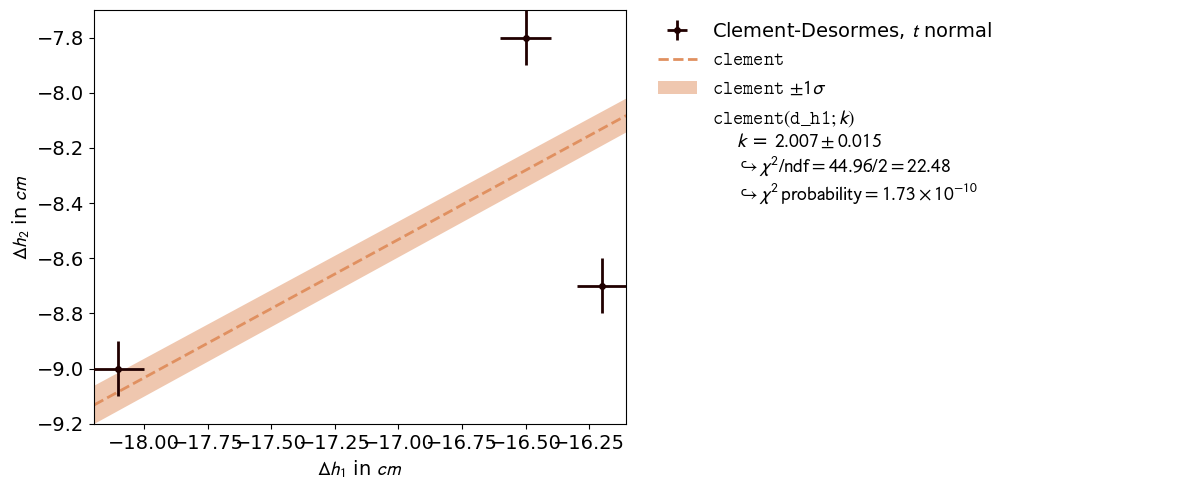

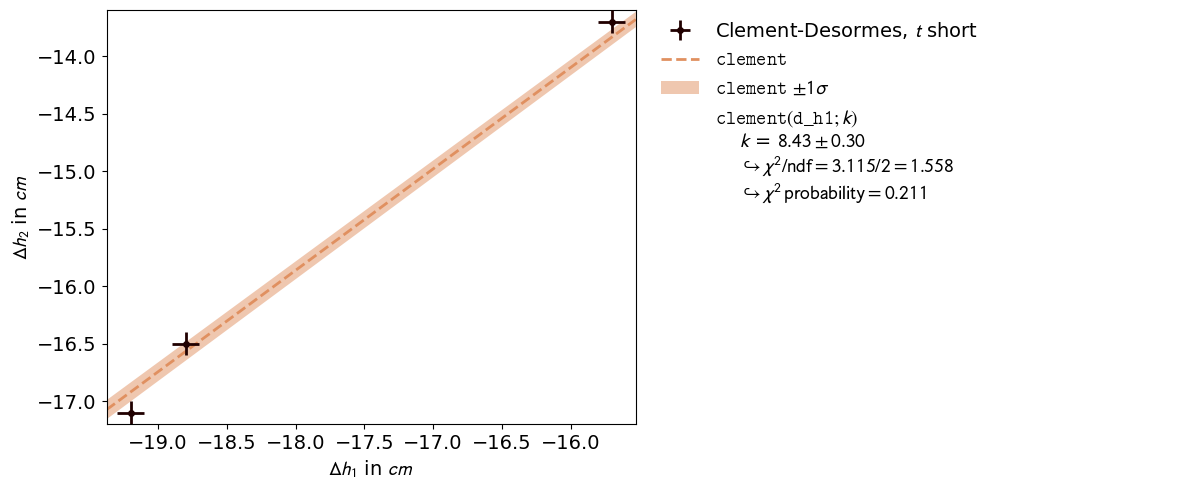

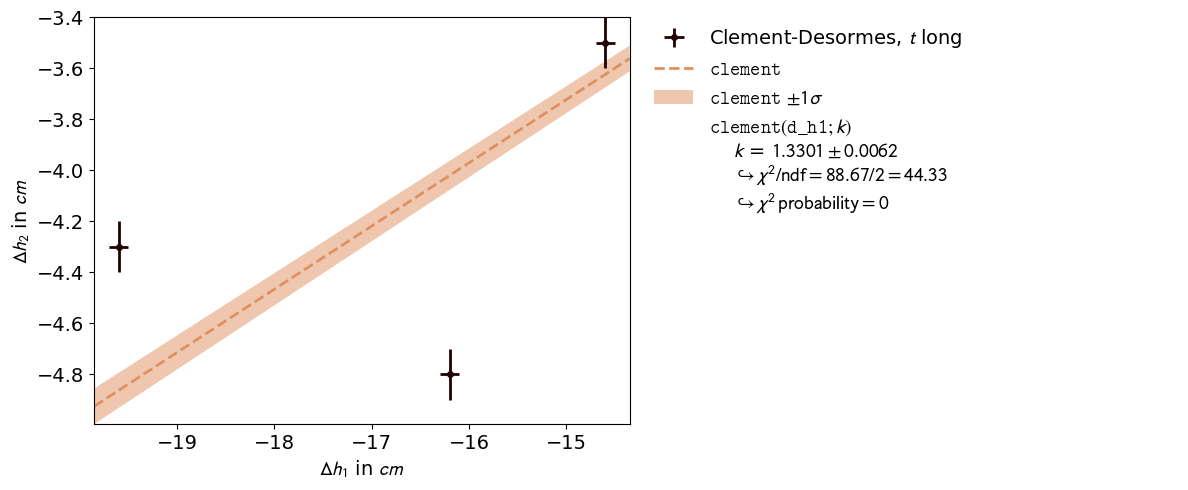

In [9]:
def clement(d_h1, k=1):
    return d_h1 * (k-1) / k

data_clement_normal = np.array([ delta_h1_normal , delta_h2_normal ])
data_clement_short = np.array([ delta_h1_short , delta_h2_short ])
data_clement_long = np.array([ delta_h1_long , delta_h2_long ])
error_clement = np.ones(2) * h_21_std
label_clement = [ "$\Delta h_1$ in $cm$" , "$\Delta h_2$ in $cm$" ]
title_clement_normal = "Clement-Desormes, $t$ normal"
title_clement_short = "Clement-Desormes, $t$ short"
title_clement_long = "Clement-Desormes, $t$ long"

fit_res_normal = fit_funktion(data_clement_normal, clement, error_clement, label_clement, title_clement_normal)
fit_res_short = fit_funktion(data_clement_short, clement, error_clement, label_clement, title_clement_short)
fit_res_long = fit_funktion(data_clement_long, clement, error_clement, label_clement, title_clement_long)

fit_res_normal[2].plot()
fit_res_short[2].plot()
fit_res_long[2].plot()
fit_res_normal[2].show()
fit_res_short[2].show()
fit_res_long[2].show()

Offenbar haben wir zu wenig Messwerte genommen, deshalb scheitern sowohl der erste als auch letzte Fit. Laut [Wikipedia]("https://de.wikipedia.org/wiki/Isentropenexponent") wird für den Adiabatenexponenten von Luft bei Raumtemperatur $\kappa=1.4$ erwartet.  
- Der dritte Fit, bei dem das Ventil länger als sonst offen gehalten wurde, liefert ein Ergebnis, das mit $\kappa=(1.3301\pm0.0062)$ relativ nah am Literaturwert liegt. Das ist höchstwahrscheinlich aber nur Zufall, da der Fit sehr schlecht ausgefallen ist: $\chi^2\,probability=0$  
- Der erste Fit, bei dem das Ventil nach Gefühl angemessen lang offen gehalten wurde, liefert mit $\kappa=(2.007\pm0.0015)$ ein schlechteres Ergebnis, die Güte des Fits ist jedoch marginal besser: $\chi^2\,probability=1.73\cdot 10^{-10}$  
- Der zweite Fit, bei dem das Ventil nur kurz offen gehalten wurde, liefert mit $\kappa=(8.43\pm0.30)$ das schlechteste Ergebnis, da die Werte aber sehr schön auf einer Geraden liegen, ist die Güte des Fits mit einer $\chi^2\,probability=0.211$ relativ gut.  

Wir hätten definitiv mehr Messwerte nehmen müssen, um hier ein besseres Ergebnis zu erhalten. So kann man der Messung und somit dem Ergebnis entweder nicht trauen (Fits 1 und 3), weil die Güte des Fits zu niedrig ist, oder aber ein Vergleich mit dem Literaturwert zeigt, dass das Ergebnis falsch ist (Fit 2). Daher ist es fraglich, wie viel Sinn es noch macht, Messwert und Unsicherheit aus den 3 verschiedenen Ergebnissen zu bestimmen. Das Ergebnis ist wahrscheinlich wenig aussagekräftig, wir machen es aber trotzdem:

In [10]:
kappa = np.array([2.007, 8.43, 1.3301]) # normal, short, long
kappa_std = np.array([0.0015, 0.30, 0.0062]) # normal, short, long

kappa_bar = np.sum(kappa/kappa_std) / np.sum(1/kappa_std)
kappa_bar_std = np.sqrt( (kappa.size/(kappa.size-1)) * ( np.sum( (kappa-kappa_bar)**2 / kappa_std ) / np.sum( 1/kappa_std ) ) )

print(f"kappa = ({kappa_bar:.3f} +/- {kappa_bar_std:.3f})")

kappa = (1.901 +/- 0.604)


Die Mittelung ergibt $\kappa=(1.901\pm0.604)$. Damit liegt der Literaturwert zumindest innerhalb einer Standardabweichung unseres Ergebnisses, die Aussagekraft steht aber natürlich zur Debatte.

# Bis hier

### Aufgabe 2.2: Messung nach der Methode von [Rüchardt](https://de.wikipedia.org/wiki/R%C3%BCchardt-Experiment)

**Für diese Aufgabe stehen Ihnen zwei Messaufbauten zur Verfügung. Sie können zwischen einem Aufbau nach der originalen Methode nach Rüchard und einem Aufbau mit elektronischer Datenaufzeichnung und Kolbenprober wählen. Das Messprinzip ist für beide Aufgaben gleich. Nach der originalen Methode von Rüchard bestimmen Sie $\kappa$ nur für Luft. Mit dem Aufbau mit elektronischer Datenaufzeichnung und Kolbenprober bestimmen Sie $\kappa$ für Luft und für das Edelgas Argon ($\mathrm{Ar}$).**

 * Beschreiben Sie den Prozess zur Bestimmung von $\kappa$ in eigenen Worten. 
 * Führen Sie, mit dem gewählten Aufbau, eine geeignete Messreihe zur Bestimmung von $\kappa$ durch.
 * Bestimmen Sie daraus $\kappa$ mit entsprechender Unsicherheit $\Delta\kappa$.

---
In diesem Versuch wurde die originale Methode nach Rüchard genutzt, die wie folgt funktioniert:  
Eine Glasflasche (selber Bauart wie die in Aufgabe 2.1) wird oben mit einem Stopfen verschlossen, der ein Loch so hat, dass ein Präzisionsgefertigtes Glasrohr perfekt hindurchpasst und (bis auf das Glasrohr selbst natürlich) die Glasflasche Luftdicht abschließt. Dann wird oben in das Glasrohr eine Stahlkugel eingelassen, die exakt den Innendurchmesser des Glasrohrs als Durchmesser hat, sodass die Stahlkugel das Glasrohr so perfekt wie möglich luftdicht abschließt. Glasrohr und Stahlkugel müssen sauber sein, damit die Kugel beim Fallen so wenig wie möglich am Rohr reibt.  
Wird die Kugel nun fallengelassen, komprimiert sie die Luft unter sich, die aber nirgends entweichen kann, da die ganze Apparatur luftdicht verschlossen ist. Irgendwann kann das Gewicht der Kugel die Luft nicht weiter komprimieren und letztere dehnt sich wieder aus, was die Kugel wieder nach oben treibt. Dann reicht die Energie der komprimierten Luft nicht mehr aus, um die Kugel weiter hoch zu treiben und die Kugel fällt wieder. Was wir erhalten, ist ein gedämpfter harmonischer Oszillator, dessen Amplitude aufgrund der Luftreibung immer weiter abnimmt. Sobald die Schwingung vollständig abgeklungen ist, sieht man, dass die Kugel langsam nach unten fällt, da Luft entweichen kann. Kugel und Rohr dichten natürlich nicht perfekt ab, aber hinreichend gut um die anfängliche Schwingung ein paar Perioden lang beobachten zu können.  
Misst man dann die Zeit, die die Kugel für einige Perioden (bei uns meist zwischen 10 und 15) braucht, kann man ebenfalls den Adiabatenkoeffizienten von Luft bestimmen.  

Die Formel, um den Adiabatenkoeffizienten zu bestimmen, wurde in der Vorbereitung hergeleitet:
$$\kappa=\bigg( \frac{2\pi}{T} \bigg) ^2\frac{mV}{pA^2}$$

- Die Periodendauern $T$ berechnet man über die Anzahl der gemessenen Perioden und der Dauer für diese Perioden  
- Die Masse $m$ der Kugel beträgt laut Datenblatt $m=(16.68\pm0.01668)\cdot 10^{-3}\,kg$  
- Der Innendurchmesser des Rohrs bzw. Durchmesser der Kugel beträgt laut Datenblatt $d=(16\pm0.008)\cdot 10^{-3}\,m$  
- Das Volumen des Luftkissens beträgt laut Versuchsanweisung $V=(10.58\pm0.03174)\,l=(10.58\pm 0.03174)\cdot 10^{-3}\,m^3$  
- Der Umgebungsdruck wurde zu $p=(1000\pm 1)\,mbar$ bestimmt  
- Den Rohrinnenquerschnitt lässt sich mit dem Innendurchmesser bestimmen: $A=(2.01\pm 0.02)\cdot 10^{-4}\,m^2=(2.01\pm 0.02)\,cm$  

Da wir die Messung mehrere Male durchgeführt haben, erhalten wir mehrere Werte für $\kappa$ und $\Delta \kappa$, daher nehmen wir noch das gewichtete Mittel aus allen $\kappa$.  


Wir definieren uns zunächst die wichtigen Größen mit zugehöriger Unsicherheit und die Messung, also wie viel Zeit die Kugel für wie viel Perioden braucht:

In [11]:
n_perioden = np.array([16, 14, 13, 13, 15, 12, 9]) # Anzahl an Perioden

zeit = np.array([16.34, 15.36, 14.35, 14.46, 16.36, 13.22, 9.82]) # Dauer für n Perioden, in s
zeit_std = .5 #s

periodendauern = zeit / n_perioden # Periodendauern in s
periodendauern_std = zeit_std / n_perioden

m_kugel = 16.68 * 10**(-3) # Masse der Kugel in kg
m_std = m_kugel * 0.001

d_kugel = 16 * 10**(-3) # Durchmesser der Kugel in m
d_std = d_kugel * 0.005

vol_luft = 10.58 * 10**(-3) # Volumen des Luftkissens in m^3
vol_std = vol_luft * 0.003

A_kugel = np.pi * (d_kugel/2)**2 # Querschnitt der Kugel bzw. Rohrinnenquerschnitt
A_std = np.pi * d_kugel * d_std / 2

druck_ugb = 10**5 # Umgebungsdruck in Pa
druck_std = 10**2


Jetzt berechnen wir zu jedem Messpunkt, also den verschiedenen Periodendauern, jeweils ein $\kappa$:

In [12]:
kappa_rue = (2*np.pi/periodendauern)**2 * m_kugel * vol_luft / (druck_ugb * (A_kugel**2) )
kappa_rue_std = np.absolute(kappa_rue) * np.sqrt( (m_std/m_kugel)**2 + (2*periodendauern_std/periodendauern)**2 + (vol_std/vol_luft)**2 + (druck_std/druck_ugb)**2 + (A_std/A_kugel)**2)

Aus diesen $\kappa$ berechnen wir den gewichteten Mittelwert und dazugehörige Unsicherheit aus allen Fehlerbehafteten Größen:

In [13]:
kappa_rue_bar = np.sum(kappa_rue/kappa_rue_std) / np.sum(1/kappa_rue_std)
kappa_rue_bar_std = np.sqrt( (kappa_rue.size/(kappa_rue.size-1)) * ( np.sum( (kappa_rue-kappa_rue_bar)**2 / kappa_rue_std ) / np.sum( 1 / kappa_rue_std ) ) )

print(f"kappa = {kappa_rue_bar:.3f} ")
print(f"delta kappa = {kappa_rue_bar_std:.3f} ")

kappa = 1.458 
delta kappa = 0.088 


Wir erhalten durch die Mittelung einen recht guten Wert für den Adiabatenkoeffizienten von $\kappa=(1.458\pm 0.088)$. Der Wert selbst ist zwar etwas höher als der Literaturwert von $\kappa_{exp}=1.4$, letzterer liegt aber innerhalb einer Standardabweichung unseres Wertes. Die Methode funktioniert also überraschend gut dafür, wie einfach vom Prinzip her sie ist, natürlich abgesehen von den konstruktionellen Schwierigkeiten bei der exakten Herstellung von Kugel und Rohr.

## Aufgabe 3: Dampfdruckkurve von n-Hexan

**Hinweise zu Aufgabe 3 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Ideales_und_reales_Gas/doc/Hinweise-Versuchsdurchfuehrung-a.md).**

 * Bestimmen Sie die Dampfdruckkurve von $1\,\mathrm{mol}$ n-Hexan zwischen Zimmertemperatur und $0^{\circ}\mathrm{C}$. 
 * Schätzen Sie daraus die molare Verdampfungswärme $Q_{\mathrm{M}}$ von n-Hexan ab. 

---

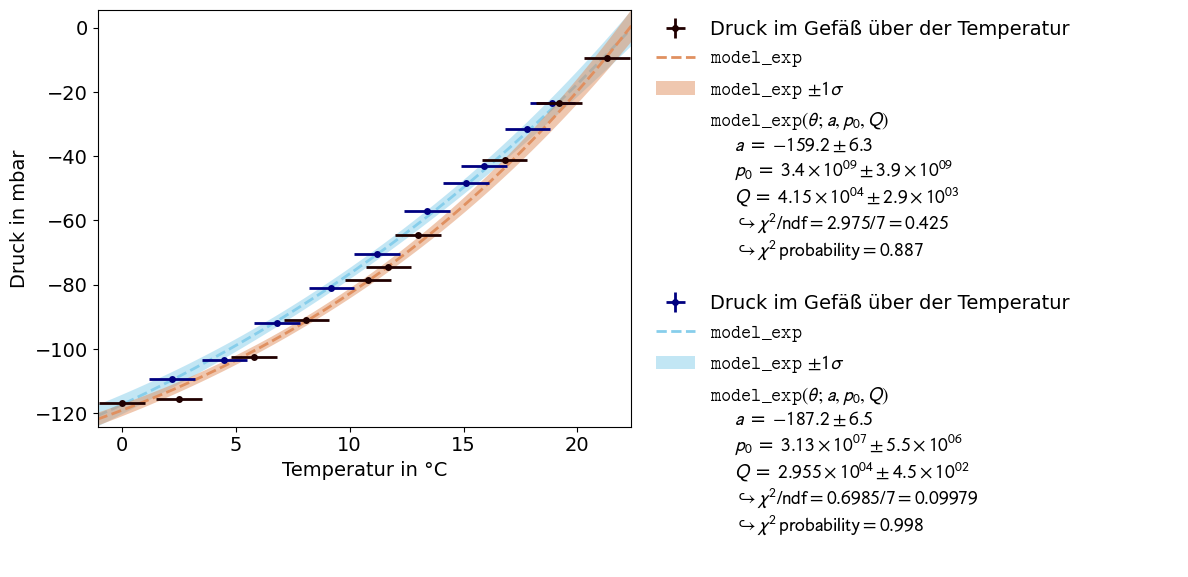

In [17]:
def model_exp(theta,a=-140,p_0=0,Q=39000):
    return p_0 * np.exp(-Q/(8.314*(theta+273.15))) + a

# Bestimmung der Messwerte und verschieben in passende Arrays
h_l = 40.11
h_r = 40.83
h_03 = (h_l + h_r)/2

h_runter = np.array([40.83,41.35,42.02,42.89,43.26,43.42, 43.88, 44.31, 44.81, 44.85])
h_hoch = np.array([44.57,44.35,43.92,43.51,43.11,42.61,42.28,42.08,41.65,41.35])

T_runter = [21.3,19.2,16.8,13.,11.7,10.8,8.1,5.8,2.5,0]
T_hoch = [2.2,4.5,6.8,9.2,11.2,13.4,15.1,15.9,17.8,18.9]

p_runter = lam*(h_03-h_runter)*20
p_hoch = lam*(h_03-h_hoch)*20

#erstellen eines Fits
xy_data1 = kafe2.XYContainer(T_runter,p_runter)
xy_data1.axis_labels = ('Temperatur in °C','Druck in mbar')
xy_data1.label = 'Druck im Gefäß über der Temperatur'

fit1 = kafe2.XYFit(xy_data1,model_exp)
fit1.add_error('x',err_val = 1)
fit1.add_error('y',err_val = 1.33322*0.2)
fit1.do_fit()

xy_data2 = kafe2.XYContainer(T_hoch,p_hoch)
xy_data2.axis_labels = ('Temperatur in °C','Druck in mbar')
xy_data2.label = 'Druck im Gefäß über der Temperatur'

fit2 = kafe2.XYFit(xy_data2,model_exp)
fit2.add_error('x',err_val = 1)
fit2.add_error('y',err_val = 1.33322*0.2)
fit2.do_fit()

plot = kafe2.plot([fit1,fit2])
plt.show()

In [15]:
Q_1 = ufloat(fit1.parameter_values[1],fit1.parameter_errors[1])
Q_2 = ufloat(fit2.parameter_values[1],fit2.parameter_errors[1])

Q = ufloat((Q_1.n/Q_1.s**2 + Q_2.n/Q_2.s**2)/(1/Q_1.s**2 + 1/Q_2.s**2), np.sqrt(2/(1/Q_1.s**2 + 1/Q_2.s**2)))
print(f'Die molare Verdampfungswärme von n-Hexan beträgt {Q/1000} kJ/mol')#

Die molare Verdampfungswärme von n-Hexan beträgt (3.5+/-0.9)e+04 kJ/mol


In dieser Aufgabe wird mithilfe eines Quecksilbermanometers Der Druck in einem Gefäß mit Hexan gemessen und so die Dampfdruckkurve von n-Hexan bestimmt. 

Gemessen wird hierbei, indem bei Normaldruck beide Höhen des Quecksilbers genommen und deren Mittel gebildet wird. Die Höhe wird dann nurnoch in einer Säule in Bezug auf dieses Mittel gemessen und muss dann noch verdoppelt werden, da die Höhendifferenz doppelt mit der Höhenänderung einer Säule steigt. Die Umrechnungsformeln von Höhendifferenz zu Druck sind bereits in Aufgabe 1 gegeben und werden nicht nochmal aufgelistet. 

Wird nun das Modell für eine Dampfdruckkurve $p(T) = p_0 e^{-\frac{Q_M}{RT}}$ jeweils in der Kurve, die beim Erkalten aufgenommen wurde (orange) und in der, die beim Erwärmen aufgenommen wurde (blau), eingepasst, erhält man zwei Werte, deren gewichteter Mittelwert dann gebildet wird. Somit beläuft sich die molare Verdampfungswärme von n-Hexan auf $Q = 35 \pm 9 \frac{kJ}{mol K}$. $\chi^2$ ist in den gemachten Fit's akzeptabel.

---